# Project 1: Explanatory Data Analysis & Data Presentation (Movies Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 1 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Data Import and first Inspection

1. __Import__ the movies dataset from the CSV file "movies_complete.csv". __Inspect__ the data.

In [1]:
import pandas as pd
df = pd.read_csv("movies_complete.csv")

<Axes: title={'center': 'Budget vs Revenue'}, xlabel='budget_musd', ylabel='revenue_musd'>

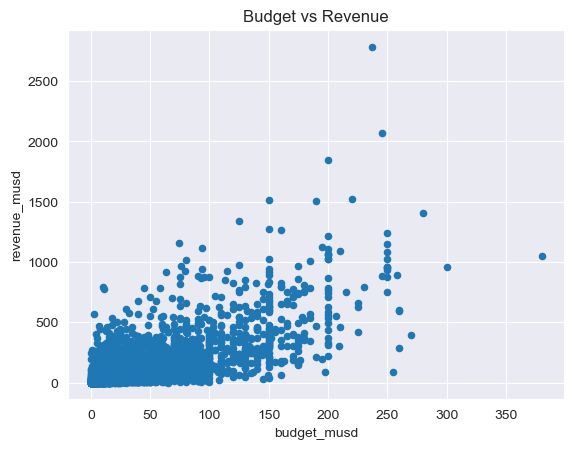

In [2]:
df.plot.scatter(x='budget_musd', y='revenue_musd', title='Budget vs Revenue')

__Some additional information on Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [2]:
df

In [3]:
df.info()

In [4]:
df.describe()

In [5]:
df.title

## The best and the worst movies...

2. __Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

__Define__ an appropriate __user-defined function__ to reuse code.

__Movies Top 5 - Highest Revenue__

In [6]:
df.sort_values(by= 'revenue_musd', ascending= False).head(5)

__Movies Top 5 - Highest Budget__

In [7]:
df.sort_values(by= 'budget_musd', ascending= False).head(5)

__Movies Top 5 - Highest Profit__

In [8]:
df_profits = df.copy()
df_profits['profits'] = df_profits['revenue_musd'] - df_profits['budget_musd']
df_profits.sort_values(by='profits', ascending= False).head(5)

__Movies Top 5 - Lowest Profit__

In [9]:
df_profits.sort_values(by='profits').head(5)


__Movies Top 5 - Highest ROI__

In [10]:
df_roi = df.copy()
df_roi['roi'] = df_roi['revenue_musd'] / df_roi['budget_musd']
df_roi['roi'] = df_roi['roi'].round(6)
df_roi[df_roi['budget_musd'] >=10].sort_values(by='roi', ascending= False).head(5)

__Movies Top 5 - Lowest ROI__

In [11]:
df_roi[df_roi['budget_musd'] >=10].sort_values(by='roi').head(5)


__Movies Top 5 - Most Votes__

In [12]:
df.sort_values(by='vote_average', ascending= False).head(5)

__Movies Top 5 - Highest Rating__

In [13]:
df[df['vote_count'] >= 10].sort_values(by= 'vote_average', ascending= False).head(5)

__Movies Top 5 - Lowest Rating__

In [14]:
df[df['vote_count'] >= 10].sort_values(by= 'vote_average').head(5)


__Movies Top 5 - Most Popular__

In [15]:
df.sort_values(by='popularity', ascending= False).head(5)

## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

In [16]:
df[df['genres'].str.contains('Science Fiction', na= False) &df['genres'].str.contains('Action', na= False) & df['cast'].str.contains
    ('Bruce Willis', na= False)].sort_values(by='vote_count', ascending= False)

__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

In [17]:
df[df['cast'].str.contains('Uma Thurman', na= False) & df['director'].str.contains
    ('Quentin Tarantino', na= False)].sort_values(by='runtime')

__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

In [18]:
from datetime import datetime
df['release_date'] = pd.to_datetime(df['release_date'])
start_date = datetime(2010, 1, 1)
end_date = datetime(2015, 12, 31)
df[df['production_companies'].str.contains('Pixar', na=False) & 
                (df['release_date'] >= start_date) & 
                (df['release_date'] <= end_date)]

__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [19]:
from datetime import datetime
df['release_date'] = pd.to_datetime(df['release_date'])
condition = (
    df['genres'].str.contains('Thriller', na=False) | 
    df['genres'].str.contains('Action', na=False)
) & (df['original_language'] == 'en') & (df['vote_average'] >= 7.5)
df[condition].sort_values(by='release_date', ascending=False)

## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

hint: use groupby()

In [20]:
df_analysis = df.copy()

In [21]:
def is_collections(row):
    if isinstance(row['belongs_to_collection'], str):
        return 'Part of a collection'
    else:
        return 'Not a collection'

df_analysis['is_collection'] = df.apply(is_collections, axis=1)

df_analysis

__Franchise vs. Stand-alone: Average Revenue__

In [22]:
df_analysis.groupby(by=['is_collection']).revenue_musd.mean()

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [23]:
def roi_profit(row):
    roi = row['revenue_musd'] / row['budget_musd']
    profits = row['revenue_musd'] - row['budget_musd']
    if profits == 0:
        return None
    else: return roi / profits
df_analysis['roi_prof'] = df.apply(roi_profit, axis=1)



df_analysis.groupby(by='is_collection')['roi_prof'].median().dropna()


__Franchise vs. Stand-alone: Average Budget__

In [24]:
df_analysis.groupby(by='is_collection')['budget_musd'].mean().dropna()

__Franchise vs. Stand-alone: Average Popularity__

In [25]:
df_analysis.groupby(by='is_collection')['popularity'].mean().dropna()

__Franchise vs. Stand-alone: Average Rating__

In [26]:
df_analysis.groupby(by='is_collection')['vote_average'].mean()

## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [27]:
df_analysis[df_analysis['is_collection'] == 'Part of a collection']

__Total number of movies__

In [28]:
df_analysis['belongs_to_collection'].value_counts()

__Most budget total__

In [29]:
df_analysis.dropna(subset=['budget_musd']).groupby(by='belongs_to_collection')['budget_musd'].sum().sort_values(ascending=False)

__Most budget mean__

In [30]:
df_analysis.dropna(subset=['budget_musd']).groupby(by='belongs_to_collection')['budget_musd'].mean().sort_values(ascending=False)

__Most revenue total__

In [31]:
df_analysis.dropna(subset='revenue_musd').groupby(by='belongs_to_collection')['revenue_musd'].sum().sort_values(ascending=False)

__Most revenue mean__

In [32]:
df_analysis.dropna(subset='revenue_musd').groupby(by='belongs_to_collection')['revenue_musd'].mean().sort_values(ascending=False)

__most Rating mean__

In [33]:
df_analysis.dropna(subset='vote_average').groupby(by='belongs_to_collection')['vote_average'].mean().sort_values(ascending=False)

## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__

__Direct most numbers of movies__

In [34]:
df_analysis['director'].value_counts().dropna()

__Direct most revenue movies__

In [35]:
df_analysis.dropna(subset=['revenue_musd']).groupby(by=['director'])['revenue_musd'].sum().sort_values(ascending=False)

__Direct most rating movies__

In [36]:
df_analysis.dropna(subset=['vote_average']).groupby(by=['director'])['vote_average'].sum().sort_values(ascending=False)